## Anomaly detection
For this example, we will take the same CSV file with the info on number of connnections for 5 applications, but this time we will evaluate the data of 1 application to determine the anomalies within its observations.




In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest
sns.set()



#Leemos los datos
app_conn_df = pd.read_csv('App-connections.csv')
print('We show a sample of the obtained data')
app_conn_df.head()

Mostramos un ejemplo de los datos obtenidos


,App 1,App 2,App 3,App 4,App 5
0,535,108,150,762,459
1,350,42,21,623,236
2,77,109,84,136,694
3,216,153,23,167,100
4,521,27,25,353,687


Now we will use Scikit-learn with IsolationForests to find the anomalies. This will allow us to know in which ranges we can find anomalies. Naturally, too low or too high values will be considered anomales, but we can also have anomalous zones in intermediate points. This could also mean that we lack more data or something happened on that interval and it needs further exploration.


In [2]:
isolation_forest = IsolationForest(n_estimators=100)              #Create an instance of IsolationForest with 100 estimators
isolation_forest.fit(app_conn_df['App 1'].values.reshape(-1,1))   #Extract data from App 1

#Now we generate a set of data ranging from 0 to a threshold, this can be the value of CONDBAT zPARM.
xx = np.linspace(0, 800, len(app_conn_df)).reshape(-1,1)

anomaly_score = isolation_forest.decision_function(xx)            #Get the anomaly index for each number
                                                                  #between 0 and 800 for our example
                                                                  


outlier = isolation_forest.predict(xx)                            #We also query the decision of the estimator

C:\Users\je671107\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.

C:\Users\je671107\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\je671107\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



Now that we have all the data, we just need to plot it. Matplotlib will be taken in this example.

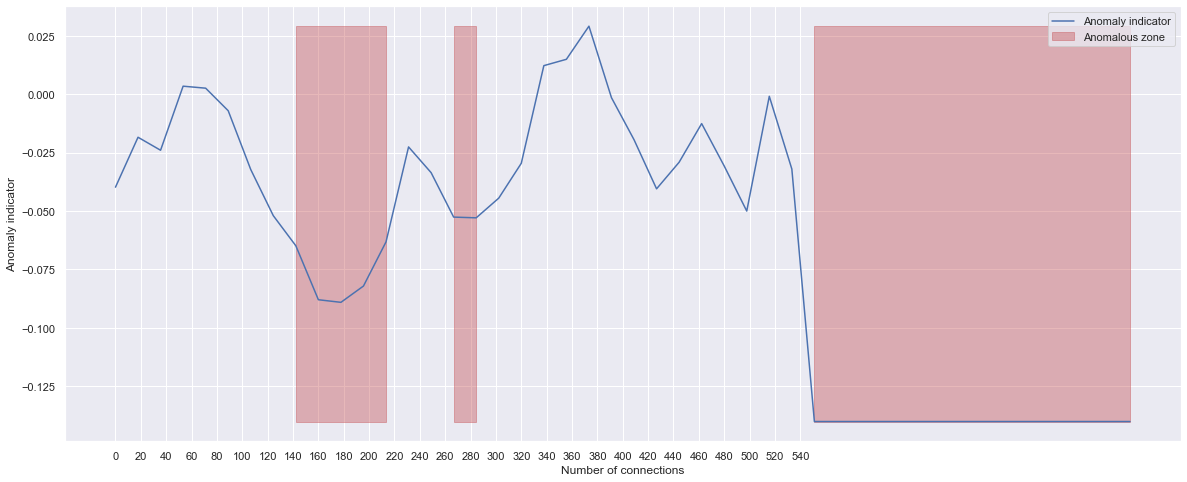

In [4]:
# Now we show a matplotlib chart
plt.figure(figsize = (20,8))
plt.plot(xx, anomaly_score, label='Anomaly indicator')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                where=outlier==-1, color='r',
                alpha=.4, label='Anomalous zone')
plt.legend()
plt.ylabel('Anomaly indicator')
plt.xlabel('Number of connections')
plt.xticks(np.arange(0,550,20))
plt.show()

We can see a range of anomalous values at the ending (maximum values).

The anomalous index is an evaluation on the depth level of the node that made the decision for that particular value, this means, it tells how many times the tree has to be split to make a decision.

The lower we see this indicator, the bigger the chances it will be that it's an anomaly. This means that the anomalous zone will be observed in the range of values with the lowest index values.
